In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
data=DataFrame(np.array([[-0.86,-0.30,-0.05,0.73],[5,5,5,5],[0,1,3,5]]),index=["Dose","Number of animals","Number of deaths"]).T
print data

   Dose  Number of animals  Number of deaths
0 -0.86                  5                 0
1 -0.30                  5                 1
2 -0.05                  5                 3
3  0.73                  5                 5


In [8]:
y=data.ix[:,2]
n=data.ix[:,1]
x=data.ix[:,0]

In [ ]:
def L1(n,y,x,p,sigma2):
    return y-n*np.exp(p)/(1+np.exp(p))-(p-(alpha+beta*x))/sigma2

def L2(n,p,sigma2):
    return -n*np.exp(p)/np.square(1+np.exp(p))-1./sigma2
    
    
def weighted_lr(n,y,X,ite,size):
    p=len(X.T)
    V=np.linalg.inv(np.dot(X.T,X))
    I=np.identity(len(data))
    ita=[0]
    for i in range(ite):
        z=ita[i]-L1(n,y,x,ita[i],sigma2)/L2(n,ita[i],sigma2)
        sigma2=
        Q_inv=1./sigma2*I
        beta_hat.append(np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(X.T,Q_inv),X)),X.T),Q_inv),z).tolist())
    V_beta=np.linalg.inv(np.dot(np.dot(X.T,1./sigma2*I),X))
    beta=np.random.multivariate_normal(beta_hat[len(beta_hat)-1],V_beta,size=size)
    return [beta,beta_hat]

In [10]:
def posterior(n,y,x,p,alpha,beta,sigma2):
    return np.prod(np.power(np.exp(p),y)*np.power(1+np.exp(p),-n)*1./(np.power(1./sigma2,3./2))*np.exp(-1./2*np.square(p-alpha-beta*x)/sigma2))

In [27]:
rang=np.arange(-10,30,0.01)
p=[]
for i in range(len(rang)):
    p.append(posterior(n,y,x,rang[i],1,7.5,1))

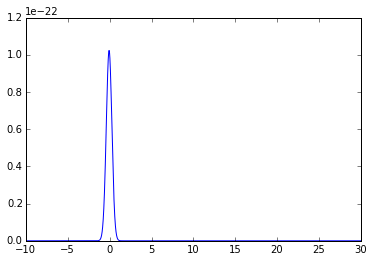

In [28]:
plt.plot(rang,p)

In [29]:
max(p)

1.0235284626778358e-22

In [191]:
def MH(n,y,x,ite):
    N=len(n)
    p=[]
    alpha=[1.0]
    beta=[7.5]
    sigma2=[1.0]
    p_old=np.array([0,0,0,0])
    for i in range(ite):
        p_new=np.random.multivariate_normal(np.zeros(4),np.identity(4))
        alp=posterior(n,y,x,p_new,alpha[i],beta[i],sigma2[i])/posterior(n,y,x,p_old,alpha[i],beta[i],sigma2[i])
        if alp>np.random.uniform():
            p.append(p_new.tolist())
            p_old=p_new
        else:
            p.append(p_old.tolist())
        alpha.append(np.random.normal((np.sum(p[i])-beta[i]*np.sum(x))/N,np.sqrt(sigma2[i]/N)))
        beta.append(np.random.normal(np.sum(p[i]*x)/np.sum(x)-alpha[i+1],np.sqrt(sigma2[i]/np.sum(np.square(x)))))
        #sigma2.append((3*N-2)*np.sum(np.square(np.array(p[i])-alpha[i+1]-beta[i+1]*x))/np.random.chisquare(df=3*N-2))
        sigma2.append(1.0)
    return [p,alpha,beta,sigma2]

In [192]:
result=MH(n,y,x,1000)

In [193]:
theta=np.exp(DataFrame(result[0]))/(1+np.exp(DataFrame(result[0])))
alpha=result[1]
beta=result[2]
sigma2=result[3]

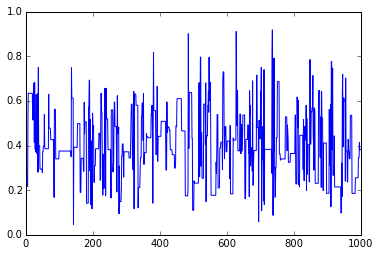

In [194]:
plt.plot(theta.ix[:,0])

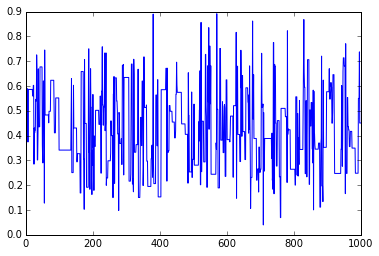

In [195]:
plt.plot(theta.ix[:,1])

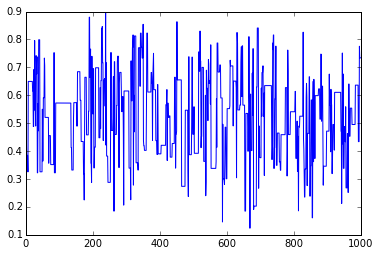

In [196]:
plt.plot(theta.ix[:,2])

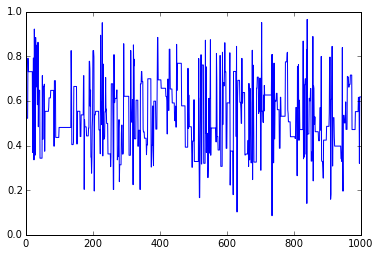

In [197]:
plt.plot(theta.ix[:,3])

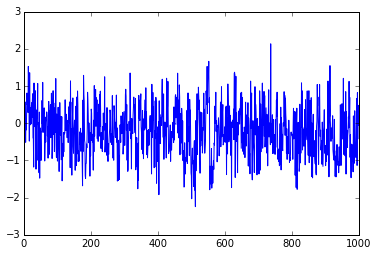

In [198]:
plt.plot(alpha)

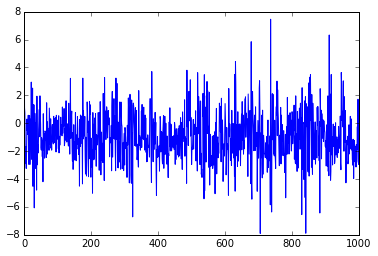

In [199]:
plt.plot(beta)

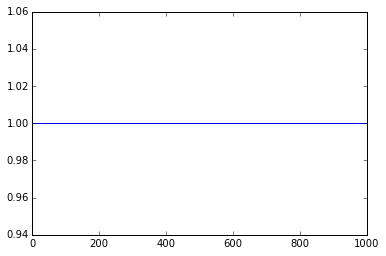

In [200]:
plt.plot(sigma2)